In [1]:
import pandas as pd

In [3]:
MIns = pd.read_csv("C:/Users/Shubham/Downloads/medical_insurance (1).csv")
MIns.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.

    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution ei

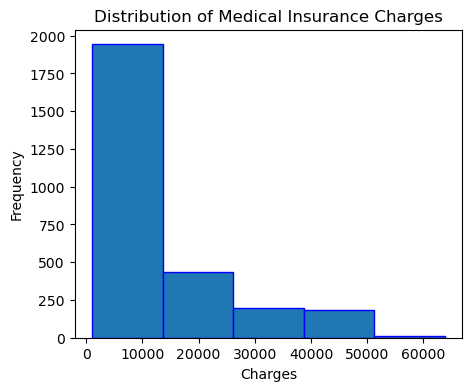

In [9]:
# What is the distribution of medical insurance charges?
plt.figure(figsize = (5,4))
plt.hist(MIns['charges'], bins = 5, edgecolor = 'blue')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Insurance Charges')
plt.show()

In [11]:
print('Destribution of Age :', MIns['age'].describe())

Destribution of Age : count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [13]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate, simila

Text(0.5, 1.0, 'Age Distribution of the Individual')

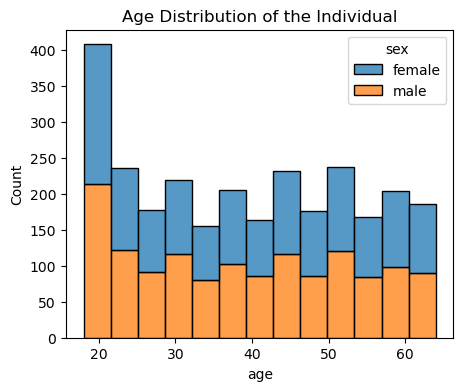

In [15]:
# What is the age distribution of the individuals?
plt.figure(figsize = (5,4))
sns.histplot(x = MIns['age'], stat = 'count', hue = MIns['sex'], multiple = 'stack')
plt.title('Age Distribution of the Individual')

Text(0.5, 1.0, 'Data of Smoker and Non-smoker')

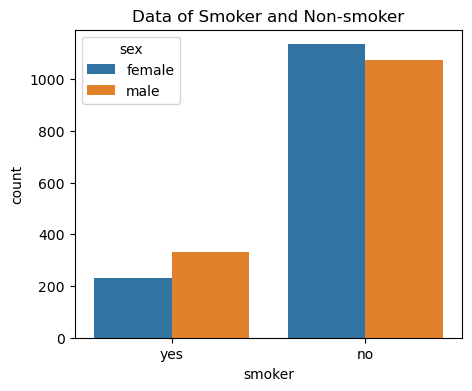

In [23]:
# How many people are smokers vs non-smokers?
plt.figure(figsize = (5,4))
sns.countplot(x = 'smoker', hue = 'sex', data = MIns)
plt.title('Data of Smoker and Non-smoker')

In [21]:
# What is the average BMI in the dataset?
A = MIns['bmi'].mean()
print('Average BMI in the Dataset :', A)

Average BMI in the Dataset : 30.70134920634921


Text(0.5, 1.0, 'Regions With Number of Policy Holder')

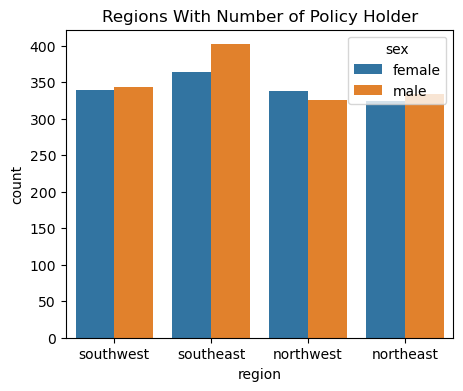

In [27]:
# Which regions have the most number of policyholders?
plt.figure(figsize = (5,4))
sns.countplot(x = 'region', hue = 'sex', data = MIns)
plt.title('Regions With Number of Policy Holder')

Text(0.5, 1.0, 'Charges Vary with Age')

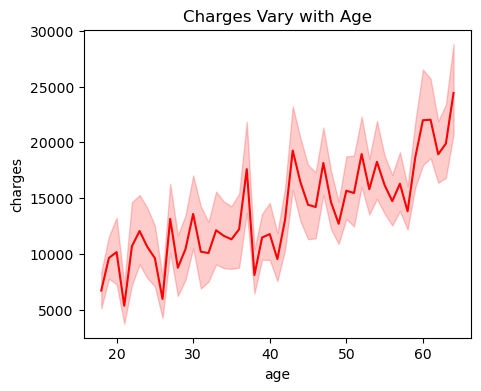

In [33]:
# How do charges vary with age?
plt.figure(figsize = (5,4))
sns.lineplot(x = MIns['age'], y = MIns['charges'], color = 'red')
plt.title('Charges Vary with Age')

In [39]:
# Is there a difference in average charges between smokers and non-smokers?
Average_Yes = MIns[MIns['smoker'] == 'yes']['charges'].mean()
Average_No = MIns[MIns['smoker'] == 'no']['charges'].mean()
Difference = Average_Yes - Average_No
print('Average Charges of Smoker :', Average_Yes)
print('Average Charges of Non-smoker :', Average_No)
print('Difference in Average Charges btw Smokers and Non-smokers :', Difference)

Average Charges of Smoker : 32223.139763617022
Average Charges of Non-smoker : 8417.8744111404
Difference in Average Charges btw Smokers and Non-smokers : 23805.26535247662


In [ ]:
# Does BMI impact insurance charges?
Correlation = MIns['bmi'].corr(MIns['charges'], method = 'pearson')


In [27]:
# Do men or women pay more on average?
OvCharge = MIns['charges'].mean()
print('Overall Average Charges :', OvCharge)
Category = MIns.groupby('sex')['charges'].mean()
print(Category)
print('Female Average charges :', Category[0])
print('Male Average charges :', Category[1])
if Category[1] > OvCharge:
    print('Men pay more an Average')
elif Category[0] > OvCharge:
    print('Women pay more an Average')
else:
    print('Nothing')

Overall Average Charges : 13261.369959046897
sex
female    12486.831977
male      14013.872721
Name: charges, dtype: float64
Female Average charges : 12486.831976850657
Male Average charges : 14013.872721266003
Men pay more an Average


Text(0.5, 1.0, 'Correlation Between the Children and Charges')

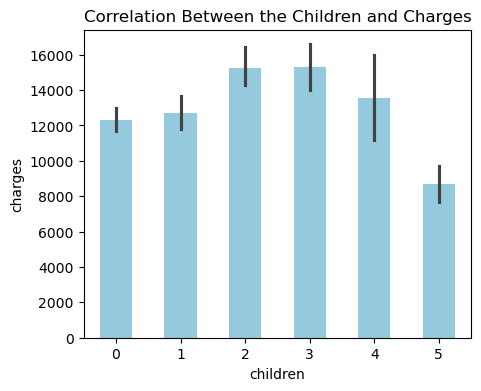

In [47]:
# Is there a correlation between the number of children and the insurance charges?
plt.figure(figsize = (5,4))
sns.barplot(x = MIns['children'], y = MIns['charges'], width = 0.5, color = 'skyblue')
plt.title('Correlation Between the Children and Charges')

Text(0.5, 1.0, 'Smoke status with Age and Medical Charges')

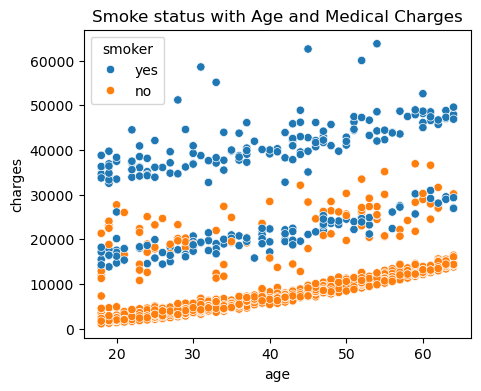

In [13]:
# How does smoking status combined with age affect medical charges?
plt.figure(figsize = (5, 4))
sns.scatterplot(x = MIns['age'], y = MIns['charges'], hue = MIns['smoker'])
plt.title('Smoke status with Age and Medical Charges')

In [15]:
# What is the impact of gender and region on charges for smokers?
smokers = MIns[MIns['smoker'] == 'yes']
summary = smokers.groupby(['sex', 'region'])['charges'].agg(['mean', 'median', 'count']).reset_index()
print(summary)

      sex     region          mean       median  count
0  female  northeast  28032.046398  22331.56680     58
1  female  northwest  29670.824946  28950.46920     58
2  female  southeast  33104.030692  35595.58980     74
3  female  southwest  31687.988430  34166.27300     42
4    male  northeast  31097.567329  34254.05335     78
5    male  northwest  30237.771862  25512.27495     60
6    male  southeast  36615.450465  39611.75770    118
7    male  southwest  32710.405068  35835.39750     76


Text(0.5, 1.0, 'Combined Effect of Age, BMI, and Smoking on Insurance Cost')

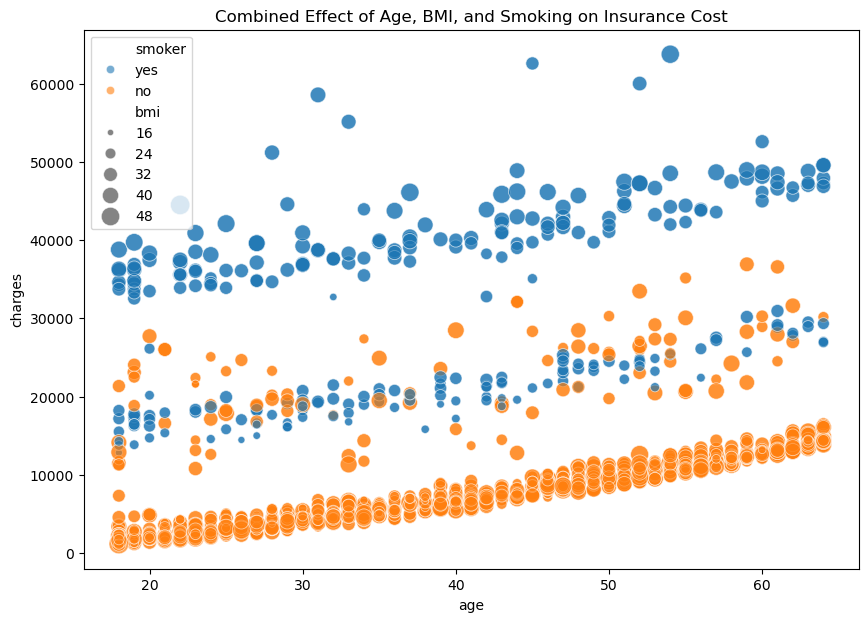

In [37]:
# How do age, BMI, and smoking status together affect insurance cost?
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', size = 'bmi', data = MIns, sizes = (20,200), alpha = 0.6)
plt.title('Combined Effect of Age, BMI, and Smoking on Insurance Cost')

In [41]:
# Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?
from scipy.stats import  ttest_ind
Smoker = MIns[(MIns['bmi'] > 30) & (MIns['smoker'] == 'yes')]
Non_Smoker = MIns[(MIns['bmi'] > 30) & (MIns['smoker'] == 'no')]

Mean_smoker = Smoker['charges'].mean()
Mean_N_smoker = Non_Smoker['charges'].mean()

t_stat, p_value = ttest_ind(
    Smoker['charges'],
    Non_Smoker['charges'],
    equal_var = False
)

print('Average Charge of Smoker :', Mean_smoker)
print('Average Charge of Non_Smoker :', Mean_N_smoker)
print('T_Statistic :', t_stat)
print('P_Value :', p_value)

if p_value < 0.05:
    print("Difference is statistically significant.")
else:
    print("No statistically significant difference.")

Average Charge of Smoker : 41672.02312304636
Average Charge of Non_Smoker : 8802.189835360825
T_Statistic : 87.03178780382932
P_Value : 1.2009424077764824e-299
Difference is statistically significant.


Text(0.5, 1.0, 'Outliers in the charges column')

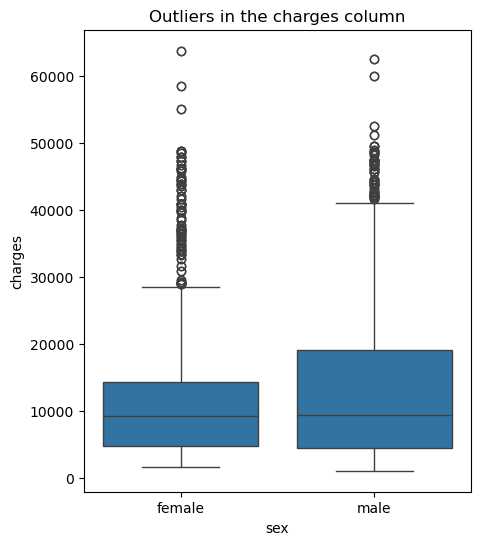

In [45]:
# Are there outliers in the charges column? Who are the individuals paying the highest costs?
plt.figure(figsize = (5,6))
sns.boxplot(x = 'sex', y = 'charges', data = MIns)
plt.title('Outliers in the charges column')

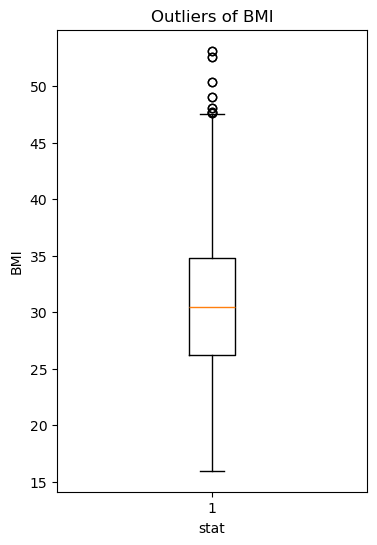

In [47]:
# Are there extreme BMI values that could skew predictions?
plt.figure(figsize = (4,6))
plt.boxplot(MIns['bmi'])
plt.xlabel('stat')
plt.ylabel('BMI')
plt.title('Outliers of BMI')
plt.show()

Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


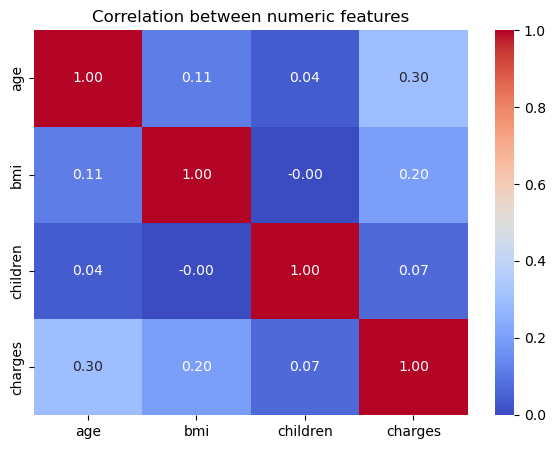

In [53]:
# What is the correlation between numeric features like age, BMI, number of children, and charges?
numeric_features = ["age", "bmi", "children", "charges"]

# Compute correlation matrix
corr_matrix = MIns[numeric_features].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numeric features")
plt.show()

charges             1.000000
smoker              0.788783
age                 0.298624
bmi                 0.199846
region_southeast    0.075652
children            0.066442
sex                 0.062837
region_northwest   -0.036874
region_southwest   -0.051686
Name: charges, dtype: float64


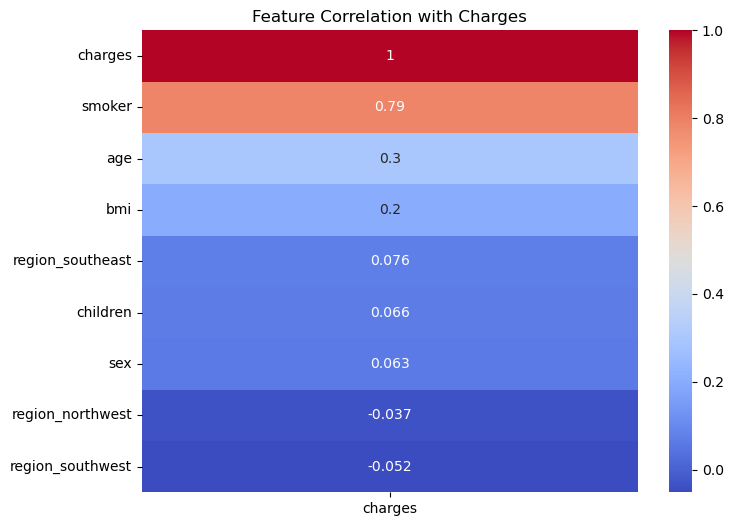

In [55]:
# Which features have the strongest correlation with the target variable (charges)?
df_encoded = MIns.copy()
df_encoded['sex'] = MIns['sex'].map({'male':1, 'female':0})
df_encoded['smoker'] = MIns['smoker'].map({'yes':1, 'no':0})
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

# Compute correlation matrix
corr = df_encoded.corr()

# Print correlations with charges
print(corr['charges'].sort_values(ascending=False))

# Plot heatmap of correlations with charges
plt.figure(figsize=(8,6))
sns.heatmap(corr[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Charges")
plt.show()